In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GNCHOLAP_DATES.csv to GNCHOLAP_DATES.csv


In [ ]:
# Required libraries

import pandas as pd

In [ ]:
#Read the dataframe

df = pd.read_csv('GNCHOLAP_DATES.csv', parse_dates=True)

In [ ]:
# Look at the structure of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SERVICE_CODE      1037 non-null   object
 1   PROCEDURE_CODE    1037 non-null   object
 2   PERFORM_DATE      1037 non-null   object
 3   NO_OF_PROCEDURES  1037 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.5+ KB


In [ ]:
# Inference:

# 1. All are object type
# 2. PERFORM_DATE has to be date time type

In [ ]:
# Convert perform date to date type

df["PERFORM_DATE"]= pd.to_datetime(df["PERFORM_DATE"])



In [ ]:
# df[df.index.duplicated()]

df

,SERVICE_CODE,PROCEDURE_CODE,PERFORM_DATE,NO_OF_PROCEDURES
0,GENERAL,GNCHOLAP,2015-08-18,1
1,GENERAL,GNCHOLAP,2015-08-20,2
2,GENERAL,GNCHOLAP,2015-08-24,1
3,GENERAL,GNCHOLAP,2015-08-27,1
4,GENERAL,GNCHOLAP,2015-10-08,1
...,...,...,...,...
1032,General,GNCHOLAP,2021-04-10,1
1033,General,GNCHOLAP,2021-04-12,1
1034,General,GNCHOLAP,2021-04-13,1
1035,General,GNCHOLAP,2021-04-18,1


In [ ]:
df = df[['PERFORM_DATE','NO_OF_PROCEDURES']]

df = df.groupby(['PERFORM_DATE'])['NO_OF_PROCEDURES'].sum().reset_index()

In [ ]:
# View the dataset

df.head()

,PERFORM_DATE,NO_OF_PROCEDURES
0,2015-08-18,1
1,2015-08-20,2
2,2015-08-24,1
3,2015-08-27,1
4,2015-10-08,1


In [ ]:
#set index

df.set_index('PERFORM_DATE', inplace = True)



,NO_OF_PROCEDURES
PERFORM_DATE,


In [ ]:
# Impute missing dates


idx = pd.date_range(min(df.index), max(df.index))

#idx

xyz = df.reindex(idx, fill_value=0)

#df_orig.reindex(idx,fill_value=0)

xyz


,NO_OF_PROCEDURES
2015-08-18,1
2015-08-19,0
2015-08-20,2
2015-08-21,0
2015-08-22,0
...,...
2021-04-15,0
2021-04-16,0
2021-04-17,0
2021-04-18,1


In [ ]:
# Create Weekly data

df.resample('W-SUN', label='left').sum()

,NO_OF_PROCEDURES
PERFORM_DATE,
2015-08-16,3
2015-08-23,2
2015-08-30,0
2015-09-06,0
2015-09-13,0
...,...
2021-03-21,5
2021-03-28,7
2021-04-04,5


In [ ]:
ts = xyz['NO_OF_PROCEDURES']
ts.head(10)

NameError: ignored

In [ ]:
# Create a validation dataset
split_point = len(df) - 12
dataset, validation = df[0:split_point], df[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 1010, Validation 12


In [ ]:
# evaluate persistence model on time series
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = series.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
  # predict
  history = [x for x in train]
predictions = list()
for i in range(len(test)):
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2.000, Expected=  2
>Predicted=2.000, Expected=  1
>Predicted=1.000, Expected=  2
>Predicted=2.000, Expected=  1
>Predicted=1.000, Expected=  1
>Predicted=1.000, Expected=  1
>Predicted=1.000, Expected=  2
>Predicted=2.000, Expected=  3
>Predicted=3.000, Expected=  2
>Predicted=2.000, Expected=  2
>Predicted=2.000, Expected=  2
>Predicted=2.000, Expected=  1
>Predicted=1.000, Expected=  1
>Predicted=1.000, Expected=  1
>Predicted=1.000, Expected=  1
>Predicted=1.000, Expected=  2
>Predicted=2.000, Expected=  2
>Predicted=2.000, Expected=  6
>Predicted=6.000, Expected=  2
>Predicted=2.000, Expected=  1
>Predicted=1.000, Expected=  2
>Predicted=2.000, Expected=  1
>Predicted=1.000, Expected=  1
>Predicted=1.000, Expected=  1
>Predicted=1.000, Expected=  3
>Predicted=3.000, Expected=  1
>Predicted=1.000, Expected=  3
>Predicted=3.000, Expected=  4
>Predicted=4.000, Expected=  2
>Predicted=2.000, Expected=  2
>Predicted=2.000, Expected=  3
>Predicted=3.000, Expected=  1
>Predict

In [ ]:
# Data Analysis

# summary statistics of time series
from pandas import read_csv
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
print(series.describe())


count    1010.000000
mean        1.662376
std         0.925292
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: 1, dtype: float64


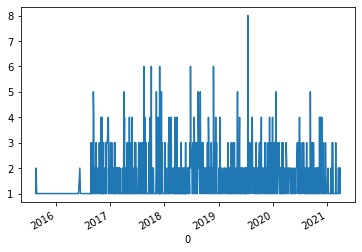

In [ ]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
series.plot()
pyplot.show()

In [ ]:
# multiple line plots of time series
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
groups = series['1964':'1970'].groupby(Grouper(freq='A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
  pyplot.subplot((n_groups*100) + 10 + i)
  i += 1
  pyplot.plot(group)
pyplot.show()

<Figure size 432x288 with 0 Axes>

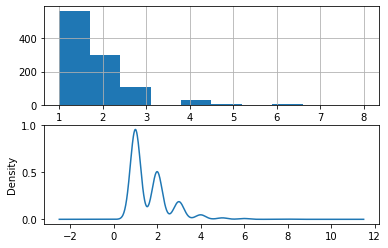

In [ ]:
# density plots of time series
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: -13.139160
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


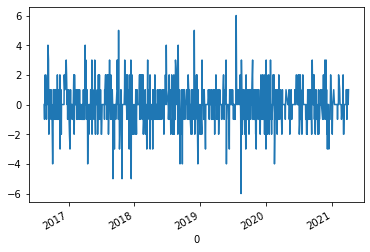

In [ ]:
# Manually Configured ARIMA

# create and summarize stationary version of time series
from pandas import read_csv
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot
# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return Series(diff)
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv', header=False)
# plot
stationary.plot()
pyplot.show()


In [ ]:
# grid search ARIMA parameters for time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy
# create a differenced series
def difference(dataset, interval=1):
  diff = list()
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
  return yhat + history[-interval]
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
  X = X.astype('float32')
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    model = ARIMA(diff, order=arima_order)
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_difference(history, yhat, months_in_year)
    predictions.append(yhat)
    history.append(test[t])
  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p,d,q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
            continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
# load dataset
series = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 1) RMSE=1.214
ARIMA(0, 0, 2) RMSE=1.211
ARIMA(0, 0, 3) RMSE=1.208
ARIMA(0, 0, 4) RMSE=1.211
ARIMA(0, 0, 5) RMSE=1.210
ARIMA(0, 0, 6) RMSE=1.225
ARIMA(0, 1, 1) RMSE=1.217
ARIMA(0, 2, 1) RMSE=1.660
ARIMA(1, 0, 0) RMSE=1.215
ARIMA(1, 0, 1) RMSE=1.188
ARIMA(1, 0, 2) RMSE=1.201
ARIMA(1, 0, 3) RMSE=1.212
ARIMA(1, 0, 4) RMSE=1.211
ARIMA(1, 0, 5) RMSE=1.213
